In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import statnlpbook.util as util
import statnlpbook.mt as mt
util.execute_notebook('word_mt.ipynb')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

ImportError: cannot import name 'plt'

NameError: name 'UniformLM' is not defined

NameError: name 'plt' is not defined

NameError: name 'UniformLM' is not defined

NameError: name 'LaplaceLM' is not defined

# Machine Translation
Consists of learning bilingual correlations between two different languages. 

##  Why is MT a challenging task? 

* Because languages are hard even for humans! 
* What's the Danish equivalent of: **''It is all Greek to me''**? 

![greektome](https://lh3.googleusercontent.com/-mQiInH86oo4/Vrtcx9p9QcI/AAAAAAAAxGg/OKJZKe0P4c0/w530-h849-p/greektome.png)




##  MT epic fails

![1](https://static.boredpanda.com/blog/wp-content/uuuploads/funny-chinese-sign-translation-fails/funny-chinese-sign-translation-fails-15.jpg)


![2](https://static.boredpanda.com/blog/wp-content/uuuploads/funny-chinese-sign-translation-fails/funny-chinese-sign-translation-fails-26.jpg)

![3](https://static.boredpanda.com/blog/wp-content/uploads/2016/06/hilarious-chinese-translation-fails-english-49-5768e94085a80__605.jpg)

![4](https://i.pinimg.com/originals/6f/ef/ee/6fefeee695c849bc1727ad92464fd111.jpg)

![5](https://alvinology.com/wp-content/uploads/2014/03/2691947209_4e4fe0d260_o.jpg)





##  That does not happen only with complicated languages like Chinese but also ...

<center><img src="../chapters/mt_figures/avocado.png"></center>




##  Machine Translation (MT)

* There are four paradigms in MT: 

  * Rule-based machine translation or RBMT: 
          is based on linking the structure of the given input sentence with
          the structure of the foreign output sentence. To translate a sentence from French to English, we need:
            * A dictionary that will map each French word to an appropriate
            English word. 
            * Rules representing regular French sentence structure. 
            * Rules representing regular English sentence structure. 
            * Rules according to which one can relate these two structures
            together. 
  * Example-based machine translation or EBMT: 
          is trained from bilingual parallel corpora containing parallel
          sentences in a **specific format**, the training sentences differ from
          each other by only one element which makes it easier for the system to
          memorize. For example, if we train on the two sentences ``Good
          postgraduate students in the CSE department are smart'' and
          ``Programmers are good people" we would be able to translate
          ``Programmers in the CSE department are smart" by just substituting
          the appropriate parts of the sentences.
  * Statistical machine translation or SMT: 
          consists of applying advanced machine learning algorithms and techniques to learn bilingual
          correlations between two languages by training on a parallel corpus.
          The parallel corpus is generally a large number of parallel sentences
          (bi-sentences), humanly translated.
  * Neural Machine Translation or NMT: 
          is a new architecture for getting machines to learn to translate by modeling the whole translation process as one big artificial neural network. The most common models in NMT are based on the encoder-decoder architecture     


##  Statistical Machine Translation 

Translate **word-by-word** 
* **foundational** to all current approaches (e.g. neural methods)
* **subcomponent** in more complex systems (for alignments)

## MT as Structured Prediction

* **source** sentence \\(\source\\)
    * aka $\x$, usually tokenized
    * "音楽 が 好き" or "Ich mag Musik"
* **target** sentence \\(\target\\)
    * aka $\y$, usually tokenized 
    * I like Music
* a **model** \\(s_\params(\target,\source)\\) to measure match of \\(\target\\) to $\source$
    * $s($I like Music,音楽 が 好き$)=12$
    * $s($I like StatNLP,音楽 が 好き$)=-20$

A translation pipeline is generally composed of: 

<center><img src="../chapters/mt_figures/pipeline.png"></center>

For most of this lecture, we consider a German-English translation task. This means that:

* **Source**: German
* **Target**: English



### Training
learn the parameters \\(\params\\) from data 
* usually from **parallel corpora** of **aligned source and target sentences**
* Where can you get such data from?

### Translation
predict highest-scoring translation given source $\source$:

\begin{equation}
\argmax_\target s_\params(\target,\source)
\end{equation}

MT approaches differ primarily in 
* how \\(s\\) is defined, 
* how \\(\params\\) are learned
* how the translation \\(\argmax\\) is found

### Modelling
How to define $s_\params(\target,\source)$?

## Generative Models 
How is the $(\target,\source)$ data **generated**? 

Develop a **distribution** $s_\params(\target,\source)=\prob_\params(\target,\source)$ that generates **faithful samples**  

**Good** generative model: samples look like
* I like music --- Ich mag Musik
* I love music --- Ich mag Musik sehr gerne 
* etc.

**Bad** generative model:
* I don't like music --- Ich mag Musik
* I love music --- Musik sehr gerne ich mag
    * *example is a reasonable translation, but very unlikely German.* 

Generative models need to model both input and output! 



How can we decompose the problem?

*in the same way we decomposed language models $\prob(w_1,\ldots,w_n)=\prob(w_1)\prob(w_2|w_1)\ldots$*

Who remembers the Markov Assumption? 


Think about the problem **backwards**
* Generate the target $\target$ using $\prob_{\params_t}(\cdot)$
* Generate the source $\source$ using $\prob_{\params_s}(\cdot|\target)$

The translation system can be modeled as 2 compounds:

* Translation model or $\prob(s|t)$: 
    assigns a conditional probability $\prob(s|t)$ to any foreign/English or source/target bisentences.
    based on lexical translation and the notion of alignment
    $\prob(avocat|lawyer)$ or $\prob(avocat|avocado)$


* Language model or $\prob(t)$:
    * helps to ensure fluency by using n-gram approximation: the next word can be predicted using a short history (one or two words)
    * t=I ate an apple            $\prob(t)=\prob(I)×\prob(ate│I)×\prob(an│I,ate)×\prob(apple|ate,an)$


This defines a **joint** distribution $\prob_\params(\target,\source) = \prob_{\params_t}(\target) \prob_{\params_s}(\source|\target)$

### Training
Find $\params$ using **MLE** (or smoothed variants)

$$
\argmax_\params \sum_{(\target,\source) \in \train} \log \prob_\params(\target, \source)
$$

### Translation
Operate **forwards**:

$$
\argmax_\target \prob_\params(\target|\source) = \argmax_\target \prob_\params(\target,\source)
$$

Why this equality? $p(\target|\source)=\frac{p(s,t)}{p(s)}$

How important would $\prob(\source)$ be if we had chosen $\prob(\target,\source) = \prob(\source) \prob(\target|\source)$?

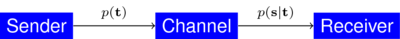

In [2]:
%%tikz
\tikzset{every node/.style={font=\sffamily,white}} 
\node[fill=blue] at (0,0) (a) {Sender}; 
\node[fill=blue] at (3,0) (b) {Channel}; 
\node[fill=blue] at (6,0) (c) {Receiver}; 
\draw[->] (a) -- (b) node [midway,above,font=\scriptsize,black]{$p(\mathbf{t})$}; 
\draw[->] (b) -- (c) node [midway,above,font=\scriptsize,black]{$p(\mathbf{s}|\mathbf{t})$};

* A message $\target$ is sent through a noisy channel and $\source$ is received
* What was $\target$?

Channel could be 

* a ethernet cable
* an encryption algorithm
* a speaker that thinks in English but speaks in German

### Noisy Channel  in SMT

* We are interested on modeling the best model that fits the data. Best model t^ is selected by considering how well it explains the date p(s|t) and how good it flows in general p(t)

* Bayes’ theorem then shows that the posterior probabilities are proportional to the numerator: t^ is the point estimate of the posterior


$\prob(\target,\source) = \prob(\target) \prob(\source|\target)$ is often called a **noisy channel model**

<center><img src="../chapters/mt_figures/noisy_channel.png"></center>

### Noisy Channel in MT
$$
\prob_\params(\target,\source) = \prob_{\params_t}(\target) \prob_{\params_s}(\source|\target)
$$

* $\prob_{\params_s}(\source|\target)$ is called the **translation model**
    * Does source match the target?
* $\prob_{\params_t}(\target)$ is the **language model**
    * Does target look like a real language?

MLE for $\prob_\params(\target,\source) = \prob_{\params_t}(\target) \prob_{\params_s}(\source|\target)$ can be calculated in two **independent steps**:
* Estimate $\params_t$ for $\prob_{\params_t}(\target)$
* Estimate $\params_s$ for $\prob_{\params_s}(\source|\target)$

What training data do you need for each? 

## Translation Models

$$
\prob^{\text{Impossible}}_\params(\source|\target) = \params_{\source,\target}
$$

For example:
$$
\prob^{\text{Impossible}}_\params(\text{Ich mag Musik }|\text{ I like music})=\params_{\text{Ich mag Musik},\text{I like music}}
$$

Why impossible?

Generally we want models that **factorize** (break up into smaller parts) for dealing with 

* **data sparsity**
* **memory limitations**
* **runtime limitations**

How did **language models** do this? 

$$
\prob(\text{I like Music})=\prob(\text{I}) \prob(\text{like | I}) \prob(\text{Music | like})
$$

Look at example for inspiration:

|Token| 1 | 2 | 3 | 4 | 
|-|---|---|---|---|
|**Target**| the | house | is | small |
|**Source**| das | Haus | ist | klein |

$$
\prob_\theta(\source|\target) = p(\text{das | the}) * p(\text{ Haus | house}) \ldots
$$

## Naive Translation Model

$$
\prob_\params^\text{Naive}(\source|\target) = \prod_i^{\length{\source}} \prob_\params(\ssource_i|\starget_i) = \prod_i^{\length{\source}} \param_{\ssource_i,\starget_i}
$$

Why naive?

### Training

Use the **Maximum Likelihood Estimate**:

$$
\params^* = \argmax_\params \sum_{(\target,\source) \in \train} \log \prob_\params(\source|\target)
$$


Amounts to **counting**: 

$$
\param^*_{\ssource,\starget} = \frac{\counts{\train}{s,t}}{\counts{\train}{t}} 
$$


In Python:

In [3]:
from collections import defaultdict 
def learn_naive_model(data):
    norm = defaultdict(float)
    counts = defaultdict(float) 
    for target, source in data:
        for i in range(0, len(target)):
            norm[target[i]] += 1.0
            counts[(source[i],target[i])] += 1.0
    result = {}
    for (source,target),score in counts.items():
        result[(source,target)] = score / norm[target]
    return result
# show defaultdict behaviour

In [4]:
naive_model = learn_naive_model([[('the','house'),('das','Haus')],
                                 [('the','house'),('das','Gebauede')]])
# try other genders or numbers 
util.Table(naive_model.items(), "2em", "20px")

"('das', 'the')",1.00
"('Haus', 'house')",0.50
"('Gebauede', 'house')",0.50


Training data:

In [5]:
util.Table(train, "1.5em", "20px")

"['the', 'house', 'is', 'small']","['das', 'Haus', 'ist', 'klein']"
"['the', 'house', 'is', 'small']","['klein', 'ist', 'das', 'Haus']"
"['a', 'man', 'is', 'tall']","['ein', 'Mann', 'ist', 'groß']"
"['my', 'house', 'is', 'small']","['klein', 'ist', 'mein', 'Haus']"


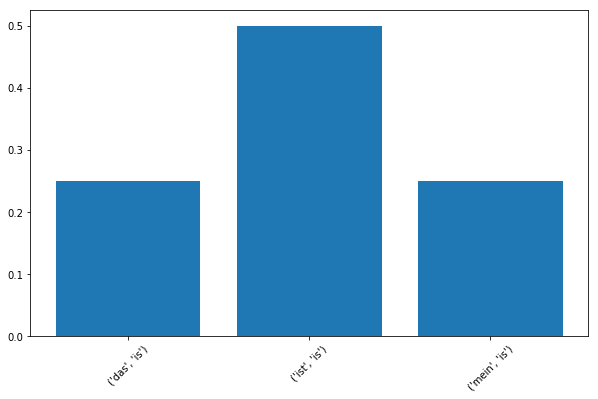

In [6]:
table = learn_naive_model(train)
plot_table_for_target(table, "is") # try house

### Translation / Decoding

Find the highest scoring target $\target$ 

$$
\target^*(\source) = \argmax_\target \prod_i^{\length{\source}} \prob_\params(\ssource_i|\starget_i)
$$


How about **brute-force** (like in our Structured Prediction example)?

### Local Decoding 

How to find this $\argmax$?

$$
\argmax_{y_1,y_2} f_1(y_1) f_2(y_2) = \ldots
$$


### Local Decoding for the Naive Model

$$
\target^*(\source) = \argmax_\target \prod_i^{\length{\source}} \prob_\params(\ssource_i|\starget_i) \\
= (\argmax_{\starget_1}  \prob_\params(\ssource_1|\starget_1), \ldots, \argmax_{\starget_{\length{\source}}}  \prob_\params(\ssource_{\length{\source}}|\starget_{\length{\source}}))
$$



In Python

In [7]:
def decode(source_sent, model, lm):
    source_to_targets = defaultdict(list)
    for (source,target),prob in model.items():
        source_to_targets[source] += [(target,prob)]
    result = []
    for tok in source_sent:
        candidates = source_to_targets[tok]
        multiplied_with_lm = [(target,prob * lm.probability(target)) 
                              for target, prob in candidates]
        target = max(multiplied_with_lm, key=lambda t: t[1])
        result.append(target[0])
    return result

lm = UniformLM(set([target for _, target in table.keys()]))
decode(["ein", "Mann"], table, lm) # try other inputs with given vocab

NameError: name 'UniformLM' is not defined

## Alignments

<center><img src="../chapters/mt_figures/alignment.png"></center>

Naive Model assumes a sequential **alignment**

In [ ]:
word_mt.Alignment("the house is small".split(" "),
                  "das Haus ist klein".split(" "),
                  [(0,0),(1,1),(2,2),(3,3)])

But word order can differ! 

In [ ]:
word_mt.Alignment("the house is small".split(" "),
                  "klein ist das Haus".split(" "),
                  [(0,2),(1,3),(2,1),(3,0)])

Formalise alignments:

* for each source sentence index \\(i \in [1 \ldots \length{\source}]\\)
    * \\(a_i \in [0 \ldots \length{\target}]\\): index of **aligned target word**
* \\(\align_i\\) can be \\(0\\)
    * Corresponds to imaginary _NULL_ token \\(\starget_0\\)


In [ ]:
word_mt.Alignment("NULL the house is small".split(" "),
                  "klein ist das Haus".split(" "),
                  [(1,2),(2,3),(3,1),(4,0)])

$a_1 = 4$ ??? 

Why the **NULL** Token? 

In [ ]:
word_mt.Alignment("NULL I like music".split(" "),
                  "音楽 が 好き".split(" "),
                  [(0,1),(2,2),(3,0)])

One-to-many translations

In [ ]:
word_mt.Alignment("NULL the house is tiny".split(" "),
                  "das Haus ist sehr klein".split(" "),
                  [(1,0),(2,1),(3,2),(4,3),(4,4)])

Many-to-one translations?

Alignments are **hidden** when given a source! 

Need to be 
* predicted or marginalised out
* modelled

## IBM Translation Models

In the late 80s, early 90s
* **IBM researchers revolutionised MT** (and Speech Recognition) 
* using statistical approaches instead of rules 


A famous IBM quote from that time

> Every time I fire a linguist, the performance of the speech recognizer goes up
> 
>  -- <cite>Fred Jelinek</cite>

Group around **Robert Mercer** were extremely successful

* then disappeared to create **Renaissance Technologies** 
![mercer](http://images.huffingtonpost.com/2014-10-23-RobertMercer-thumb.JPG)

## IBM Model 2
Translation and **alignment** model:

$$
p_\params^\text{IBM2}(\source,\aligns|\target)
$$

*Generative story* with parameters $\params = (\alpha, \beta)$

Given target sentence $\target$ (e.g. NULL I like music) with length $l_\starget$ (e.g. 4):

* Generate a **source sentence length** $l
_\ssource$ with uniform probability $\epsilon$
    * e.g. $l_\ssource=3$
* Generate a **target position** $a_i$ for each source as position $i$ with $\beta(a_i|i,l_\starget,l_\ssource)$
    * e.g. $(3,0,2)$
* Generate the **source word** $\ssource_{i}$ at $a_i$ with probability $\alpha(\ssource_i|\starget_{a_i})$ 
    * e.g. (音楽, が, 好き)

\begin{equation}
  p_\params^\text{IBM2}(\ssource_1 \ldots \ssource_{l_\ssource},\align_1 \ldots \align_{l_\ssource}|\starget_1 \ldots \starget_{l_\starget}) = \epsilon \prod_i^{l_\ssource} \alpha(\ssource_i|\starget_{a_i}) \beta(a_i|i,l_\starget,l_\ssource)
\end{equation}

Example:
$$
p_\params^\text{IBM2}(\text{das, Haus},1, 2 | \text{NULL, the, house}) = \ldots
$$

Answer: 
$$
\a(das|the) \b(1|1,3,2) \ldots
$$

## Training IBM Model 2

If we had $\train = ((\source_i, \aligns_i, \target_i))_i$ we could optimise

$$
\sum_{(\source, \aligns, \target) \in \train} \log p_\params^\text{IBM2}(\source,\aligns|\target)
$$

But we have **no training alignments** 

Instead use **sentence-aligned** data $\train = ((\source_i, \target_i))_i$ 

and **marginal log-likelihood**


$$
\sum_{(\source, \target) \in \train}   \log p_\params^\text{IBM2}(\source|\target)
$$

where

$$
p_\params^\text{IBM2}(\source|\target) = \sum_{\aligns}p_\params^\text{IBM2}(\source,\aligns|\target)
$$

**No closed-form** solution

## Expectation Maximisation (EM) Algorithm
maximises a [lower bound of marginal log-likelihood](http://localhost:8888/notebooks/chapters/em.ipynb) 

Figures out (soft) alignments by iterating:

* **E-step**: Infer alignments (or their **expectations**)
    * using current parameters
*  **M-step**: **Maximise** training objective to estimate parameters 
    * using current alignments  

How is this possible **without good initial parameters**? 

Can you find out which target words belong to which source words? 

Assume static word order (but possibly different in each language)  

In [ ]:
word_mt.Alignment("Bb Aa | Aa Cc | Qq Pp".split(" "),
                  "Xx Yy | Zz Xx | Ss Tt".split(" "),[])

$\a(X|A)= 1/2 \qquad \a(Y|A)= 1/4 \qquad \a(X|B)= \qquad \a(Y|B)= \qquad \a(T|P)=$

$\b(1|1)= 1/2 \qquad \b(1|2)= 1/2$


Formalise and implement, but for dataset with `NULL` tokens and 

* **non-monotonic** and **consistent alignment**

such that EM will 
* first learn about word-to-word correspondences
* and then about distortion

In [ ]:
train_model_2_raw = [
  ("NULL the house is small" , "klein ist das Haus"),
  ("NULL a man is tall" , "groß ist ein Mann"),
  ("NULL my house is small" , "klein ist mein Haus"),
  ("NULL the building is big" , "groß ist das Gebäude"),
  ("NULL the building is long" , "lang ist das Gebäude")
]
train_model_2 =  [(t.split(" "), s.split(" ")) for t,s in train_model_2_raw]
# What could "house" translate to? 

In [ ]:
util.Table(train_model_2_raw)

### E-Step

Calculate posterior distribution over alignments given source and target 

$$
\pi(\aligns|\source,\target) = p_\params^\text{IBM2}(\aligns|\source,\target)
$$

Distribution **factorizes** for Model 2:
$$
\pi(\aligns|\source,\target) = \prod_i^{l_{\ssource}} \pi(a_i|\source,\target,i) 
$$

with

$$
\pi(a_i|\source,\target,i) = 
  \frac
    {\alpha(\ssource_i|\starget_{a_i}) \beta(a_i|i,l_\starget,l_\ssource)}
    {\sum_j^{l_{\starget}} \alpha(\ssource_i|\starget_j) \beta(j|i,l_\starget,l_\ssource) }
$$

In [ ]:
word_mt.Alignment("1:NULL 2:the 3:house".split(" "),
                  "1:das 2:Haus".split(" "),[(1,0)])

$$
\pi(2|\source,\target,1) = \frac{\a(\text{das|the}) \b(2|1,3,2)}{\a(\text{das|the}) \b(2|1,3,2) + \a(\text{das|NULL}) \b(1|1,3,2) + \ldots}
$$

For a uniform initial model: 

In [ ]:
source_vocab = set([tok for _,s in train_model_2 for tok in s])
target_vocab = set([tok for t,_ in train_model_2 for tok in t])

alpha = mt.create_translation_table(source_vocab, target_vocab) 
#  {'is':{'ist':0.5, 'das':0.5}}
beta = mt.create_distortion_table(5) #{1:1}
init_model = IBMModel2(alpha,beta)
align_matrices = e_step(init_model, train_model_2)

def show_alignment_for_model(sent, fixed_alpha = {}, fixed_beta = {}):
    alpha_1 = mt.create_translation_table(source_vocab, target_vocab, fixed=fixed_alpha) 
    #  {'is':{'ist':0.5, 'das':0.5}}
    beta_1 = mt.create_distortion_table(5) #{1:1}
    init_model_1 = IBMModel2(alpha_1,beta_1)
    align_matrices = e_step(init_model_1, train_model_2)
    return word_mt.Alignment.from_matrix(align_matrices[sent], 
                              train_model_2[sent][1], 
                              train_model_2[sent][0])



In [ ]:
# try  {'is':{'ist':0.5, 'Haus':0.5}}
show_alignment_for_model(3,{'is':{'ist':0.5, 'Haus':0.5}})

### M-Step

The M-Step optimizes a *weighted* or *expected* version of log-likelihood using distribution \\(\pi\\) from last E-Step:

$$
  \params^* = \argmax_\params \sum_{(\target,\source) \in \train} \sum_\aligns \pi(\aligns|\target,\source) \log \prob _\params^\text{IBM2}(\source,\aligns|\target)
$$

Because \\(\pi\\) factorizes we have a closed-form solution:

$$
  \alpha(\ssource|\starget) = \frac
    {\sum_{(\target,\source)}\sum_i^{l_\source} \sum_j^{l_\target} \pi(j|i) \delta(\ssource,\ssource_i) \delta(\starget,\starget_j) }
    {\sum_{(\target,\source)} \sum_j^{l_\target} \delta(\starget,\starget_j) }
$$

\\(\delta(x,y)\\) is 1 if \\(x=y\\) and 0 otherwise

$\beta$ parameters estimated similarly ...

In [ ]:
show_alignment_for_model(0)

$$
  \alpha(\text{das|the}) = \frac
    {\sum_{(\target,\source)}\sum_i^{l_\source} \sum_j^{l_\target} \pi(j|i) \delta(\text{das},\ssource_i) \delta(\text{the},\starget_j) }
    {\sum_{(\target,\source)} \sum_j^{l_\target} \delta(\text{the},\starget_j) } \\ = \frac{0.2 * 0 * 0 + \ldots + 0.2 * 1 * 1 + \ldots}{0 + 1 + 0 + 0 + 0} = \frac{0.2}{1}
$$


Implement M-Step, estimating parameters \\(\params\\) from (soft) alignments \\(\aligns\\)

In [ ]:
theta1 = m_step(align_matrices, train_model_2)    
def show_initial_alpha(target):
    plot_table_for_target(theta1.alpha, target) 

In [ ]:
show_initial_alpha("is") 

In [ ]:
align_matrices = e_step(theta1, train_model_2)
def show_initial_alignment(sent):
    return word_mt.Alignment.from_matrix(align_matrices[sent], 
                                  train_model_2[sent][1], 
                                  train_model_2[sent][0])    

How do alignments look like with these parameters?

In [ ]:
show_initial_alignment(0)

### Initialisation
Good initialisation is **crucial for EM**

### Baby Steps
Initialise with the parameters of a simpler model with **fixed distortion** table:

$$
  \beta(a_i|i,l_\starget,l_\ssource) = \frac{1}{l_\starget + 1}
$$

This is **IBM Model 1**!

Train IBM Model 1 and see if it **converges**

In [ ]:
ibm1_iterations = em_model1(init_model, train_model_2, 100)
def plot_ibm1_change(end):
    plt.plot(range(0,end), [change for _, _, change in ibm1_iterations[:end]])

In [ ]:
plot_ibm1_change(100)

Translation Table?

In [ ]:
def show_ibm1_alpha(target):
    plot_table_for_target(ibm1_iterations[-1][1].alpha, target)

In [ ]:
show_ibm1_alpha("house")

Many-to-many alignments?



In [ ]:
def show_ibm1_alignments(sent):
    return word_mt.Alignment.from_matrix(ibm1_iterations[-1][0][sent],train_model_2[sent][1], train_model_2[sent][0])

In [ ]:
show_ibm1_alignments(0)

Distortions?

In [ ]:
def show_ibm1_distortions(si):
    util.plot_bar_graph([ibm1.beta[ti,si,5,4] for ti in range(0,5)],
                        range(0,5)) # change source index != 0

In [ ]:
show_ibm1_distortions(0)

Now learn **distortion table** in Model 2

In [ ]:
ibm1 = ibm1_iterations[-1][1] # model 1 of last iteration 

def show_ibm2_alpha(num_iterations, target):
    ibm2_iterations = em_model2(ibm1, train_model_2, num_iterations)
    ibm2 = ibm2_iterations[-1][1] # model 2 of last iteration
    plot_table_for_target(ibm2.alpha, target)
    
def show_ibm2_alignments(num_iterations, sent):
    ibm2_iterations = em_model2(ibm1, train_model_2, num_iterations)
    ibm2 = ibm2_iterations[-1][1] # model 2 of last iteration
    return word_mt.Alignment.from_matrix(ibm2_iterations[-1][0][sent],train_model_2[sent][1], train_model_2[sent][0])

def show_ibm2_distortions(num_iterations, si):
    ibm2_iterations = em_model2(ibm1, train_model_2, num_iterations)
    ibm2 = ibm2_iterations[-1][1] # model 2 of last iteration
    util.plot_bar_graph([ibm2.beta[ti,si,5,4] for ti in range(0,5)],
                    range(0,5)) # change source index != 0

In [ ]:
show_ibm2_distortions(10,0)

Many-to-many alignments? 

Run IBM models in both sides 
<center><img src="../chapters/mt_figures/ibm1.png"></center>

Then use heuristics such as union to combine the two uni-directional alignments:

<center><img src="../chapters/mt_figures/union.png"></center>

In [ ]:
show_ibm2_alignments(10, 0)

Translation Table? 

In [ ]:
show_ibm2_alpha(4, "house")

## Decoding with Model 2

Ideally **marginalise out alignments**

$$
\argmax_{\target} p_\params^\text{IBM2}(\source|\target) \prob^\text{LM}(\target)
$$

with 
$$
  p_\params^\text{IBM2}(\source|\target) =  \sum_{\aligns}  p_\params^\text{IBM2}(\source,\aligns|\target) 
$$


Computationally **very expensive**, instead find both optimal alignment and translation:

$$
\argmax_{\target,\aligns} p_\params^\text{IBM2}(\source,\aligns|\target) \prob^\text{LM}(\target)
$$


Choices:

* Simple **approximate** method
* Complex **exact** method

Both presentend in [these slides](https://www.dropbox.com/s/p495n19h5rtk3uf/IBM-decoding.pdf?dl=0)

### Beam Based Decoder
* In each step chooses **best next source word to translate**
* **Append a target word** based on source word
* Maintains a list of top-$k$ hypotheses in a **beam**

In [ ]:
uni_lm = UniformLM({w for w in target_vocab if w != 'NULL'})

In [ ]:
def show_decode_history(begin, end, beam=4, lm=uni_lm, num_iterations=3):
    ibm2_iterations = em_model2(ibm1, train_model_2, num_iterations)
    ibm2 = ibm2_iterations[-1][1] # model 2 of last iteration
    hist2 = decode_model_2(ibm2, lm, source, beam)
    return mt.render_history(hist2[begin:end])

In [ ]:
ngram_lm = LaplaceLM(NGramLM(lm_train, 3),0.1)
show_decode_history(begin=0,end=5,beam=2, lm=ngram_lm)

## Summary 

* MT is an instance structured prediction recipe
* The noisy channel is one modeling framework
* word-based MT is foundation and blue print for more complex models
* Training with EM
* NLP Tricks: 
    * introducing latent alignment variables to simplify problem
    * decoding with Beams

## Background Material
* [Lecture notes on IBM Model 1 and 2](http://www.cs.columbia.edu/~mcollins/courses/nlp2011/notes/ibm12.pdf) of Mike Collins.  
* Jurafsky & Martin, Speech and Language Processing: 
    * Chapter 26, Machine Translation.
    * Chapter 6, EM Algorithm
* Brown et al., [The Mathematics of Statistical Machine Translation: Parameter Estimation](http://www.aclweb.org/anthology/J93-2003)